In [2]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from dtw import dtw

plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']  
plt.rcParams['axes.unicode_minus'] =False 

In [3]:

# 绘图
def double_bar(x1, x2, ind, width, label1, label2):
    fig = plt.figure(figsize=[10,5])
    ax = fig.add_subplot(1, 1, 1)
    # fig, ax = plt.subplots()
    rects1 = ax.bar(
        ind,
        x1,
        width,
    )
    rects2 = ax.bar(
        ind + width,
        x2,
        width,
    )

    # 设置标签、标题和图例
    ax.set_ylabel("Avg Delay")
    ax.set_title("DT Avg Delay")
    ax.set_xticks(ind + width / 2)
    # ax.set_xticklabels(("G1", "G2", "G3", "G4", "G5"))
    ax.legend((rects1[0], rects2[0]), (label1, label2))
    return ax, rects1, rects2

# 添加数值标签
def autolabel(ax, rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{:.1f}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

In [4]:
def calc_indexes(sumo, ctm):
    mae = mean_absolute_error(sumo, ctm)
    mse = mean_squared_error(sumo, ctm)
    dist, cost, acc, path = dtw(np.array(ctm), np.array(sumo), dist=lambda x, y: np.abs(x - y))

# 打印结果
    print("MAE:", mae)
    print("MSE:", mse)
    print("DTW距离:", dist)
    # print("DTW对齐路径:", path)

def vis(sumo, ctm, time0:np.array):
    maindf = pd.DataFrame({
    'sumo':sumo,
    'ctm':ctm,
    # 'time':time0
    })
    print(maindf.describe())
    
    plt.plot(time0, sumo, label="sumo", marker=".")
    plt.plot(time0, ctm, label="og_ctm", marker=".")
    plt.legend()
# plt.ylim(0, 30)
    plt.show()


# # 构造数据
    width = 15  # 每个柱子的宽度

# plt.figure(dpi=300)

    ax, rects1, rects2 = double_bar(ctm, sumo, time0, width, 'ctm', 'sumo')
    autolabel(ax, rects1)
    autolabel(ax, rects2)
    plt.show()


    # corr = maindf.corr() 
    # print(corr)
    # sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)
    # plt.show()
    cov = maindf.cov()
    print(cov)
    sns.heatmap(cov, cmap='GnBu', annot=True, cbar=False)
    plt.show()


    sns.lmplot(
    data = maindf,
    x='ctm',
    y='sumo',
    order=1
    )
    plt.show()


    temp = sumo[0]
    for i in range(1, len(sumo)):
        sumo[i] += temp
        temp = sumo[i]
    temp = ctm[0]
    for i in range(1, len(ctm)):
        ctm[i] += temp
        temp = ctm[i]
    plt.plot(time0, sumo, label="sumo")
    plt.plot(time0, ctm, label="ctm")
    plt.legend()
    plt.show()


#     import numpy as np
#     ctm = np.array(ctm).reshape((-1, 1))
#     sumo = np.array(sumo)
#     from sklearn.linear_model import LinearRegression
#     model = LinearRegression()
# # 训练模型
#     model.fit(ctm, sumo)
# # 计算预测值
#     y_pred = model.predict(ctm)
# # 绘制原始数据和拟合直线
#     plt.scatter(ctm, sumo)
#     plt.plot(ctm, y_pred, color='red')
#     plt.show()
#     print(model.coef_, model.intercept_)


In [5]:
# sumo=[4.916436687313045, 4.32464819402042, 4.585994411170272, 4.918053251757599, 5.698892098106941, 5.460721909797618, 5.505356067066772, 4.618916082596014, 6.734249471826392, 6.855095817314461, 5.962608474698871, 5.251203763224334, 5.794156514867605, 5.797102305486308, 5.57793233370376, 5.213151859416871, 5.453349688430824, 6.228130087856089, 4.485736253290264, 5.5534046279251905, 4.240715622285456, 4.734758255283934, 5.141407725113381, 5.341307160555415]
# ctm= [444.4537353515625, 281.48767471313477, 414.7650909423828, 455.313720703125, 499.85240936279297, 438.1914520263672, 469.8202133178711, 322.7828598022461, 617.4297714233398, 818.3271026611328, 546.2598037719727, 283.0583190917969, 406.00963592529297, 644.7670745849609, 701.8075561523438, 426.26644134521484, 562.6451110839844, 481.8013381958008, 410.37879943847656, 372.9133605957031, 372.38250732421875, 443.71997833251953, 573.1111145019531, 709.1233062744141]
# time0 = [547, 603, 658, 711, 772, 826, 883, 940, 1001, 1055, 1111, 1169, 1233, 1291, 1347, 1400, 1458, 1518, 1573, 1627, 1686, 1745, 1805, 1860]
# sumo = [_ * 2 for _ in sumo]
# ctm = [_ / 44 for _ in ctm]

# time0 = np.array(time0)

## p60

MAE: 2.259998313696988
MSE: 6.595930265163555
DTW距离: 48.5363504484704
            sumo        ctm
count  24.000000  24.000000
mean    9.643758  10.603948
std     0.857583   2.591014
min     8.389477   4.382643
25%     9.123112   8.661082
50%     9.325778  10.834507
75%    10.097157  12.562441
max    11.395648  15.124964


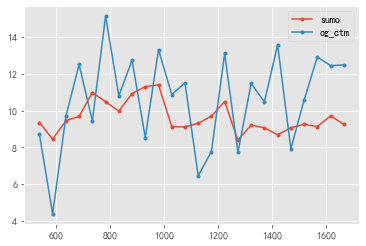

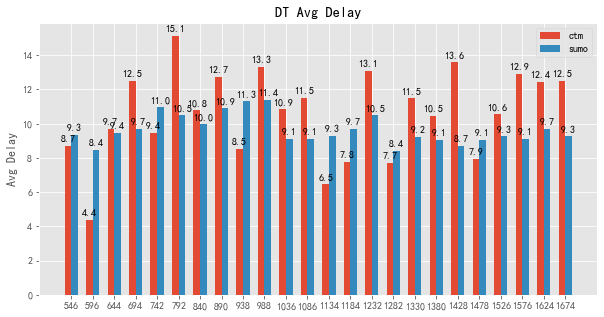

          sumo       ctm
sumo  0.735449  0.764071
ctm   0.764071  6.713354


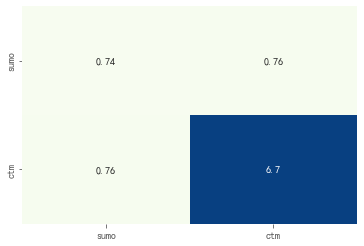

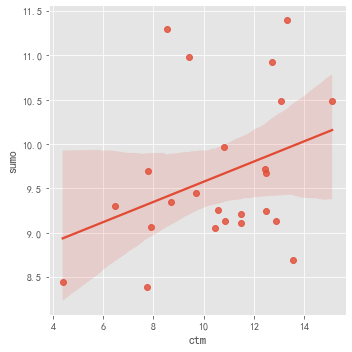

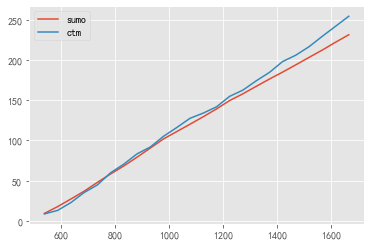

In [34]:
# sumo=[10.34582457281202, 8.882124361626149, 9.682071934439486, 9.836106503515198, 11.397784196213882, 11.026387879270315, 11.120491544845978, 9.237832165192028, 13.468498943652785, 13.710191634628922, 12.219034148990596, 11.164917521109397, 11.58831302973521, 11.897577546248778, 11.232146773815773, 10.472100413896488, 11.115315090936209, 12.456260175712178, 9.105919261485207, 11.859736970990047, 8.665577691072052, 10.087393170059498, 10.282815450226762, 11.025182407137713]
# ctm= [10.101221257990057, 6.397447152571245, 9.42647933959961, 10.348039106889205, 11.360282030972568, 9.95889663696289, 10.677732120860707, 7.335974086414684, 14.032494805075906, 18.598343242298473, 12.414995540272106, 6.433143615722656, 9.22749172557484, 14.653797149658203, 15.950171730735086, 9.687873666936701, 12.787388888272373, 10.950030413540928, 9.326790896329014, 8.475303649902344, 8.463238802823154, 10.084544962102717, 13.025252602317117, 16.116438778963957]
# time0= [544, 596, 651, 702, 758, 812, 867, 918, 974, 1030, 1083, 1138, 1194, 1251, 1305, 1358, 1412, 1468, 1525, 1580, 1629, 1684, 1735, 1790]
# sumo=[10.34582457281202, 8.882124361626149, 9.682071934439486, 9.836106503515198, 11.397784196213882, 11.026387879270315, 11.120491544845978, 9.237832165192028, 13.468498943652785, 13.710191634628922, 12.219034148990596, 11.164917521109397, 11.58831302973521, 11.897577546248778, 11.232146773815773, 10.472100413896488, 11.115315090936209, 12.456260175712178, 9.105919261485207, 11.859736970990047, 8.665577691072052, 10.087393170059498, 10.282815450226762, 11.025182407137713]
# ctm= [5.047902193936435, 3.3780054612593218, 5.0875113227150655, 5.04707163030451, 5.942663712935015, 4.922159368341619, 5.697697726162997, 4.049072265625, 7.046614560213956, 9.229025407270951, 5.7300402901389385, 3.5457695614207876, 4.710054831071333, 7.111730575561523, 8.015614422884854, 4.679280627857555, 6.792193759571422, 5.165446888316762, 4.343789707530629, 4.653337652033025, 4.117198423905806, 4.947530573064631, 6.5134945782748135, 7.676414142955434]
# time0= [544, 596, 651, 702, 758, 812, 867, 918, 974, 1030, 1083, 1138, 1194, 1251, 1305, 1358, 1412, 1468, 1525, 1580, 1629, 1684, 1735, 1790]
# ctm = [_ * 2 for _ in ctm]
sumo=[9.349893068451363, 8.445688690538187, 9.444517684647012, 9.67921141019244, 10.97847991137793, 10.482360285653344, 9.968756174800834, 10.923611582493598, 11.297757278447662, 11.395647738072105, 9.127197753389632, 9.11291253433804, 9.301662830358561, 9.701248514635378, 10.489210848414476, 8.389477434790573, 9.210094620813168, 9.057582554955491, 8.686351974282234, 9.067387858405551, 9.2504267693191, 9.126511237312496, 9.71388728305928, 9.250315233859126]
ctm= [8.704380555586381, 4.382642832669345, 9.685766913674094, 12.505568591031162, 9.43764946677468, 15.124964280561967, 10.798412669788707, 12.73305892944336, 8.531186363913797, 13.309089487249201, 10.870601480657404, 11.505937576293945, 6.4555488933216445, 7.773336063731801, 13.105499094182795, 7.727603045376864, 11.480784849687057, 10.468319979580967, 13.574859445745295, 7.921543121337891, 10.56876009160822, 12.906797582452947, 12.444493553855203, 12.477935444224965]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

## p61

MAE: 1.981316636173463
MSE: 5.152768586346462
DTW距离: 34.26428212943505
            sumo        ctm
count  24.000000  24.000000
mean    9.548603   7.662471
std     1.117516   1.518163
min     7.370990   4.017054
25%     8.911460   6.938854
50%     9.608328   7.678416
75%    10.172456   8.340142
max    11.745130  10.990503


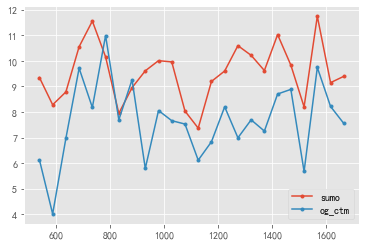

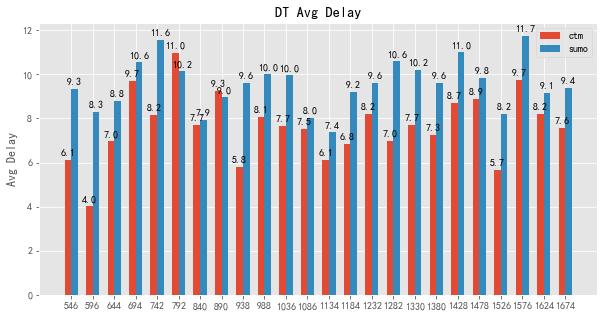

          sumo       ctm
sumo  1.248841  0.944513
ctm   0.944513  2.304818


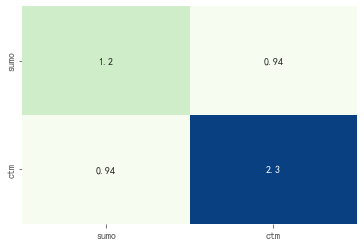

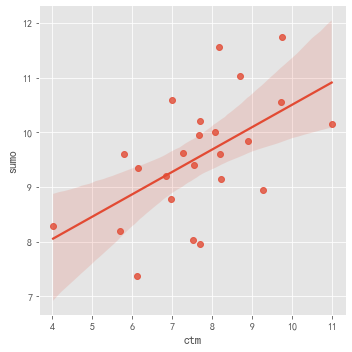

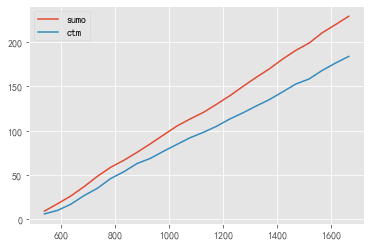

In [28]:
sumo=[9.349893068451363, 8.284384558566787, 8.786113845137518, 10.55358670460196, 11.55627641072082, 10.157626142455765, 7.948787061276861, 8.953242018696939, 9.61148215963248, 10.008960241294197, 9.95935862828683, 8.037188066772181, 7.370990480779991, 9.196076916790208, 9.605174812496442, 10.595069910481893, 10.216945558102354, 9.622271371599671, 11.027647477335353, 9.834366319469478, 8.200965373232515, 11.745130189312139, 9.149048815597085, 9.395888865061728]
ctm= [6.133321415294301, 4.0170535174283115, 6.972390521656383, 9.712251316417348, 8.178526271473277, 10.990502617575906, 7.696093645962802, 9.262580871582031, 5.794609243219549, 8.059409748424184, 7.661757902665571, 7.530501105568626, 6.118129816922274, 6.838244524869052, 8.203638250177557, 6.993135105479848, 7.695074081420898, 7.2561281377618965, 8.704861727627842, 8.88575553894043, 5.679057294672186, 9.74308880892667, 8.218569322065873, 7.554625597867099]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 1 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)


MAE: 1.981316636173463
MSE: 5.152768586346462
DTW距离: 34.26428212943505
            sumo        ctm
count  24.000000  24.000000
mean    9.548603   7.662471
std     1.117516   1.518163
min     7.370990   4.017054
25%     8.911460   6.938854
50%     9.608328   7.678416
75%    10.172456   8.340142
max    11.745130  10.990503


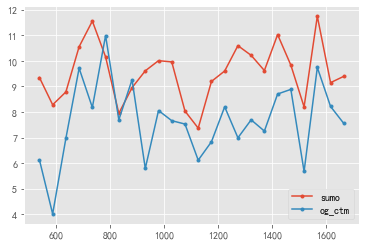

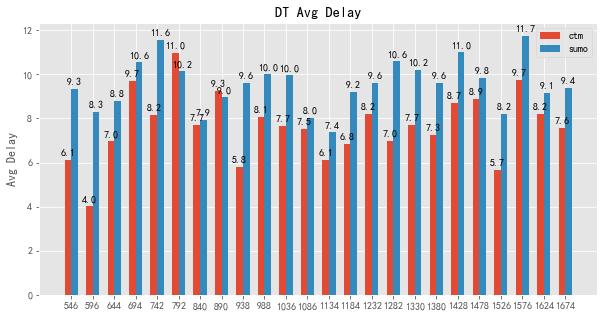

          sumo       ctm
sumo  1.248841  0.944513
ctm   0.944513  2.304818


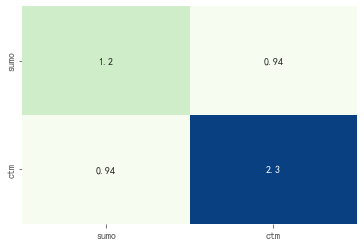

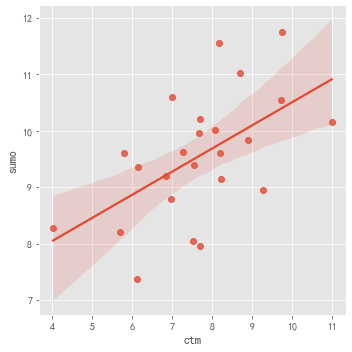

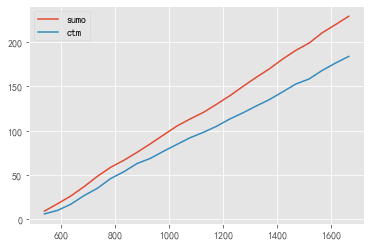

## p62

MAE: 2.964078831030779
MSE: 12.953410473051969
DTW距离: 59.39830495771814
            sumo        ctm
count  24.000000  24.000000
mean   10.662509   8.006354
std     1.522557   1.915979
min     8.810447   5.375936
25%     9.403527   6.620978
50%    10.207596   8.019554
75%    11.511270   9.183477
max    13.894319  12.770519


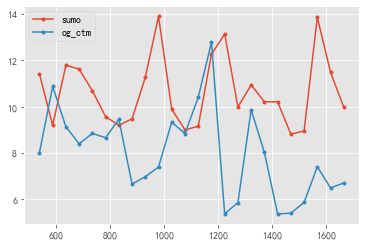

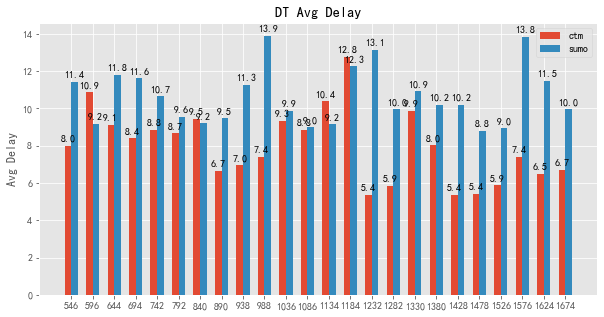

          sumo       ctm
sumo  2.318179 -0.082772
ctm  -0.082772  3.670974


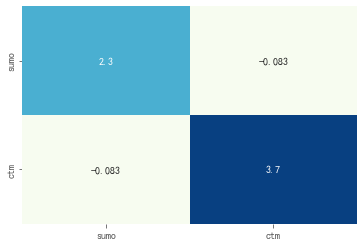

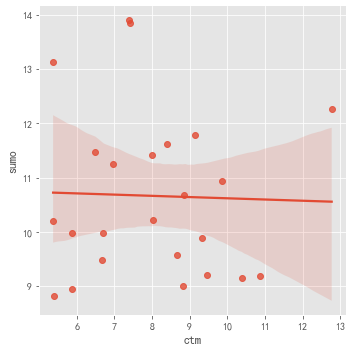

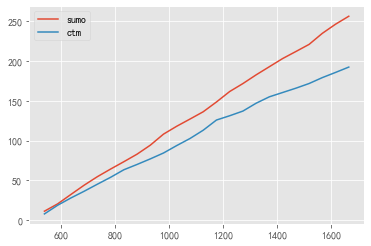

In [37]:
sumo=[11.422716163296238, 9.191150014972473, 11.783237931051358, 11.615562546776276, 10.682905702677333, 9.568385985111805, 9.199636858973717, 9.471490910636499, 11.256177573448143, 13.89431877705985, 9.885687552580249, 8.999686889051214, 9.151159326767099, 12.254151276585235, 13.1281297991357, 9.9853965232148, 10.934290378722933, 10.209295949558886, 10.205897048196475, 8.810447448791667, 8.952371592998013, 13.848928306253233, 11.476506477272883, 9.972674891694167]
ctm= [8.01215865395286, 10.867995348843662, 9.134291735562412, 8.397396261041814, 8.84451606056907, 8.659843098033559, 9.456254785711115, 6.662623665549538, 6.976649977944114, 7.398441488092596, 9.331031279130416, 8.835586201060902, 10.396417271007191, 12.770519256591797, 5.375936248085716, 5.865579084916548, 9.865874377163975, 8.026949275623668, 5.378046469254927, 5.407371954484419, 5.870262492786754, 7.412042617797852, 6.496041471307928, 6.7106632752852]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 4 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p63

MAE: 5.120876782684896
MSE: 30.636741740835145
DTW距离: 108.84328688567504
            sumo        ctm
count  24.000000  24.000000
mean   10.934896   5.814019
std     1.348854   2.138690
min     7.973909   2.697424
25%    10.100259   3.657148
50%    10.929604   6.154965
75%    11.708159   7.512918
max    13.962537   9.108985


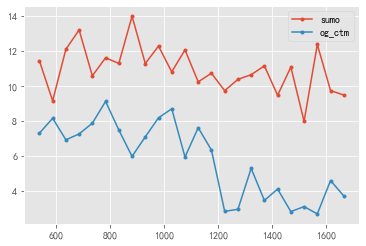

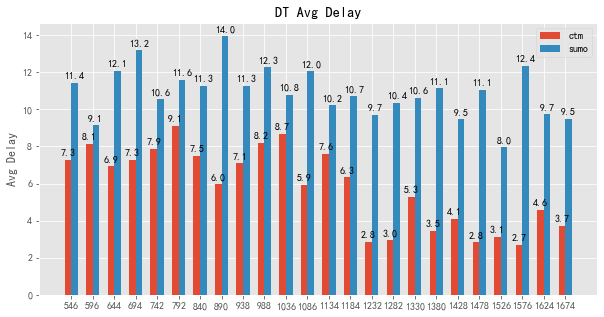

          sumo       ctm
sumo  1.819408  0.894077
ctm   0.894077  4.573993


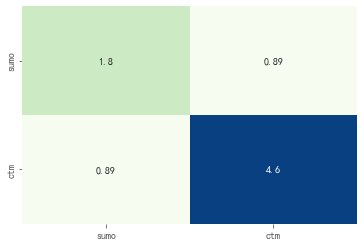

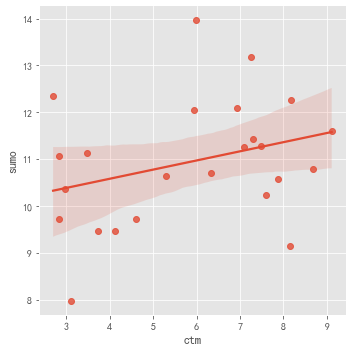

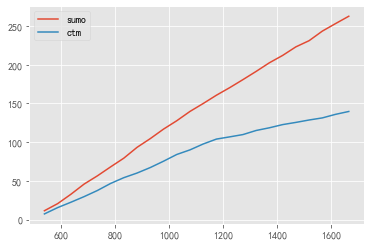

In [38]:
sumo=[11.422716163296238, 9.142566798003019, 12.081144854556298, 13.181235689003158, 10.5689860861862, 11.595552606166464, 11.272777859054813, 13.962537205122322, 11.2670623202687, 12.262952261372526, 10.792333343106014, 12.045977369439099, 10.225023757470614, 10.712922083205477, 9.720883464963169, 10.3647479454907, 10.632226976223262, 11.133208350601956, 9.459010295891622, 11.066874908102978, 7.973909031761267, 12.353492386180383, 9.725963218516622, 9.47340180803542]
ctm= [7.297382354736328, 8.148793307217685, 6.920641985806552, 7.255448428067294, 7.868606393987482, 9.108984687111594, 7.481801293113015, 5.975552038712935, 7.090327089483088, 8.174293691461736, 8.690176010131836, 5.942186442288485, 7.6062687960538, 6.334378069097346, 2.843842723152854, 2.961281646381725, 5.29215162450617, 3.4667840870943936, 4.1147049990567295, 2.829832813956521, 3.114426786249334, 2.6974240216341885, 4.600571719082919, 3.7206029891967773]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 5 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p64

MAE: 6.000714890354398
MSE: 37.20719543086985
DTW距离: 144.01715736850554
            sumo        ctm
count  24.000000  24.000000
mean    9.593878   3.593163
std     1.086017   0.805898
min     8.019696   1.404021
25%     8.877282   3.213254
50%     9.532385   3.731123
75%    10.356842   3.937979
max    12.347791   4.920306


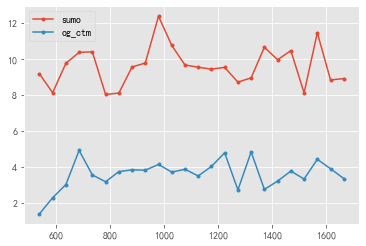

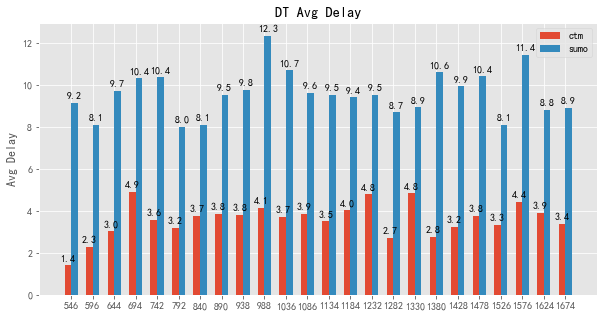

          sumo       ctm
sumo  1.179432  0.289087
ctm   0.289087  0.649472


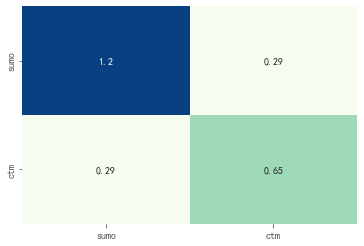

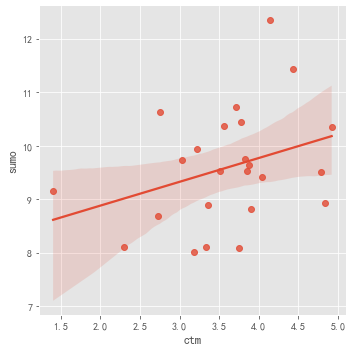

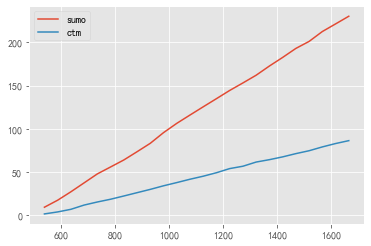

In [39]:
sumo=[9.160924711216333, 8.114175731153978, 9.740879903355804, 10.350059720322555, 10.377187498256921, 8.019695708481061, 8.092169024448122, 9.539615128395758, 9.75700583024396, 12.347791038778634, 10.732839141749043, 9.64923125385264, 9.525154238969936, 9.419235630026266, 9.516757275661002, 8.698967515793278, 8.93799042432944, 10.632353126126695, 9.940977040715506, 10.443904753627793, 8.103499411311608, 11.436498068262924, 8.819669463540004, 8.896485950465937]
ctm= [1.4040208946574817, 2.3022890090942383, 3.028495094992898, 4.920306205749512, 3.560805320739746, 3.1856601888483222, 3.74504262750799, 3.846329775723544, 3.823287703774192, 4.142607342113148, 3.717203140258789, 3.875924890691584, 3.505116592754017, 4.034791426225142, 4.786184050820091, 2.732237685810436, 4.838014515963468, 2.7589004689996894, 3.222451860254461, 3.7758887897838247, 3.3352834528142754, 4.42609266801314, 3.9057077061046255, 3.363268808885054]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 6 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p65

MAE: 7.453997891778687
MSE: 57.60906812381504
DTW距离: 178.89594940268844
            sumo        ctm
count  24.000000  24.000000
mean   10.547396   3.093398
std     1.202404   1.290342
min     8.391206   1.103582
25%     9.784733   1.818888
50%    10.434412   3.424094
75%    11.360379   4.165755
max    12.956739   5.249497


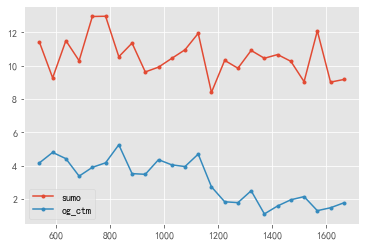

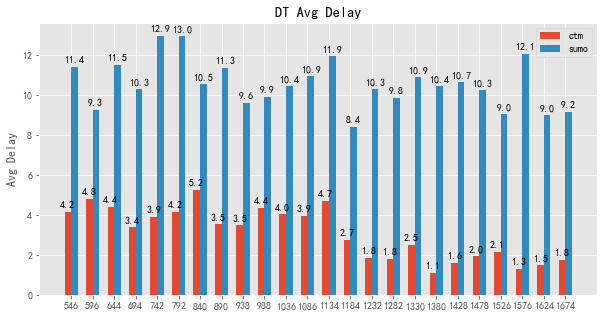

          sumo       ctm
sumo  1.445775  0.487388
ctm   0.487388  1.664984


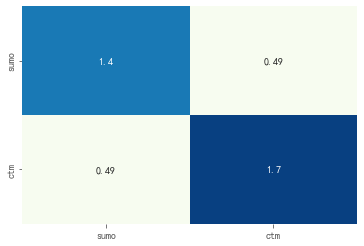

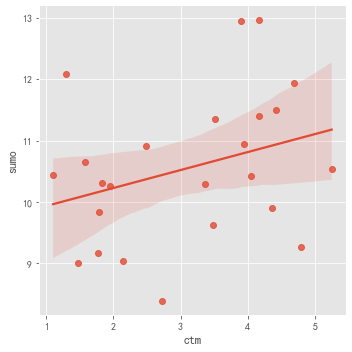

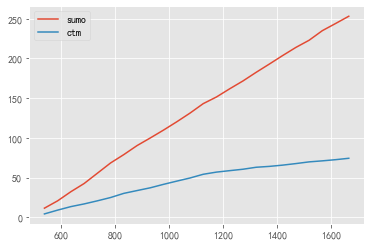

In [40]:
sumo=[11.402455504448437, 9.262140415290649, 11.494261896050043, 10.290800940928554, 12.942288114951484, 12.956739235369605, 10.529664620339611, 11.346354161360708, 9.617138753504825, 9.905324466104815, 10.431002811702372, 10.94519036307734, 11.931791927089234, 8.391205669496703, 10.31068655767732, 9.840597447637437, 10.90547209525361, 10.437821051038252, 10.659011533678182, 10.25536880100578, 9.033554543965316, 12.07752042187143, 9.00596595572175, 9.165142192216578]
ctm= [4.164944995533336, 4.791921702298251, 4.417481422424316, 3.3698907765475186, 3.897014097733931, 4.168183153325861, 5.249497240239924, 3.5200402953407983, 3.478296236558394, 4.355972896922719, 4.045475612987172, 3.944590308449485, 4.690541787581011, 2.7285374294627798, 1.8321273543617942, 1.779170578176325, 2.4917166883295234, 1.1035823822021484, 1.5807718580419368, 1.9514799118041992, 2.1413855119185015, 1.2986433506011963, 1.4735405011610552, 1.7667439850893887]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 7 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p66


MAE: 8.006353577637826
MSE: 65.30367477300204
DTW距离: 192.15248586330776
            sumo        ctm
count  24.000000  24.000000
mean   10.339020   2.332666
std     0.913539   0.988198
min     8.849701   1.092149
25%     9.740396   1.344278
50%    10.331847   2.621855
75%    11.057496   3.004506
max    11.787282   4.044875


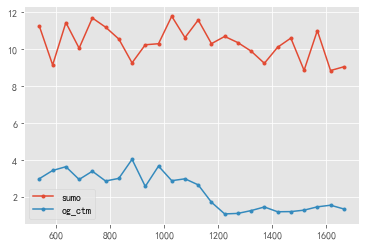

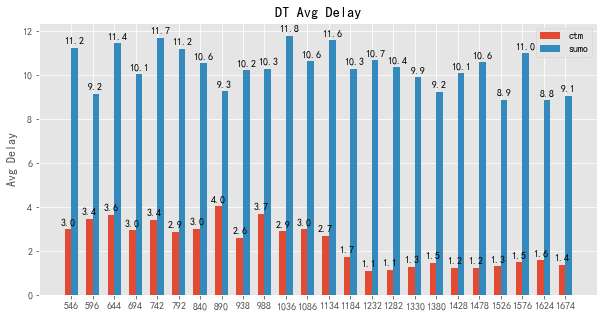

          sumo       ctm
sumo  0.834553  0.278426
ctm   0.278426  0.976536


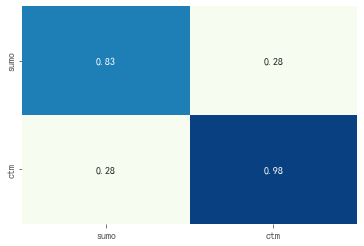

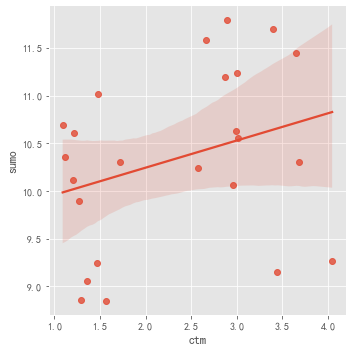

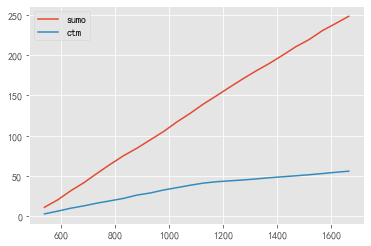

In [42]:
sumo=[11.238294357633375, 9.151460074133782, 11.445054422986766, 10.058498063450726, 11.692446664115565, 11.19631112207578, 10.555899644442354, 9.265169570211262, 10.244009928214924, 10.300811462036531, 11.787282003599508, 10.630800421196174, 11.583953112730049, 10.303798643072051, 10.69487341074827, 10.35989624884482, 9.898804200815364, 9.241188192876537, 10.110480305495555, 10.60447266198866, 8.859701944629826, 11.011224749798211, 8.849701495330642, 9.052345436038365]
ctm= [3.001105785369873, 3.4425793994556773, 3.646183880892667, 2.956604307348078, 3.402027867057107, 2.8729709711941807, 3.01470626484264, 4.044875231656161, 2.5796435096047143, 3.6790318922563032, 2.890759814869274, 2.9916182431307705, 2.6640666614879263, 1.724694100293246, 1.092149019241333, 1.1201131343841553, 1.2729797580025413, 1.4674969152970747, 1.2088099392977627, 1.2175033309242942, 1.2960409034382214, 1.4742979136380283, 1.5633761882781982, 1.360357241197066]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
# ctm = [_ * 8 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p67


MAE: 4.836983004900886
MSE: 28.08818649085242
DTW距离: 106.34275879894854
            sumo        ctm
count  24.000000  24.000000
mean   10.348019   6.227466
std     1.289454   2.941144
min     7.917743   1.784706
25%     9.699511   4.674791
50%    10.452426   5.454478
75%    11.101325   7.078500
max    12.918092  14.497227


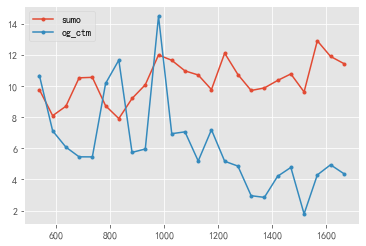

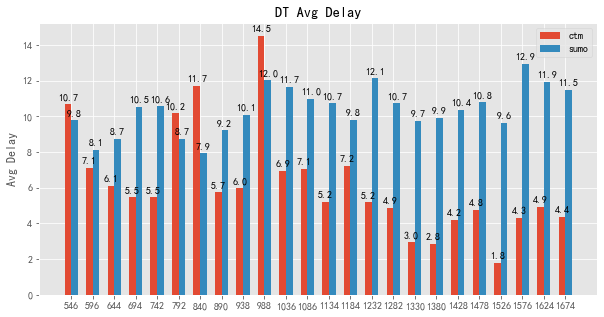

          sumo       ctm
sumo  1.662691 -0.639607
ctm  -0.639607  8.650326


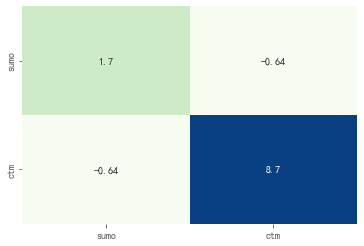

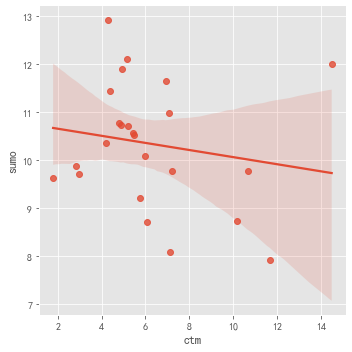

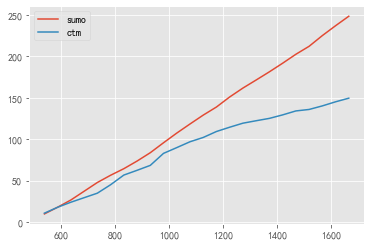

In [17]:
sumo=[9.772550226707017, 8.101539470970039, 8.709716072211867, 10.536499364429897, 10.568309464135009, 8.740491628567074, 7.917742557390434, 9.209120536673174, 10.090760772123785, 12.005543164891847, 11.66510528741193, 10.98322997553405, 10.719484865728875, 9.782660720056093, 12.120926475965568, 10.747335056945245, 9.722822067132785, 9.886302618005084, 10.368352708179621, 10.787114690114308, 9.629576648801647, 12.918092297327727, 11.913581725329102, 11.45560922351227]
ctm= [0.5342618443749168, 0.3563103892586448, 0.30407455834475433, 0.27281460436907684, 0.27263316241177643, 0.5086855454878374, 0.5838651548732411, 0.2870236743580211, 0.2980619127100164, 0.724861350926486, 0.3472381288355047, 0.3531298583204096, 0.25937708941372956, 0.3598824414339932, 0.25860545310107147, 0.24300285361029886, 0.14777454462918369, 0.1424676992676475, 0.2102945474061099, 0.23871272802352905, 0.08923531933264299, 0.21458778869022022, 0.24723817001689563, 0.21881998939947647]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
ctm = [_ * 20 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p68

MAE: 3.071252423594943
MSE: 14.277149675135227
DTW距离: 62.254550136548325
            sumo        ctm
count  24.000000  24.000000
mean    9.532456   6.570694
std     0.970995   1.936629
min     8.109272   2.340407
25%     8.804073   5.579660
50%     9.406057   6.597147
75%    10.163150   8.106931
max    11.652399  10.048671


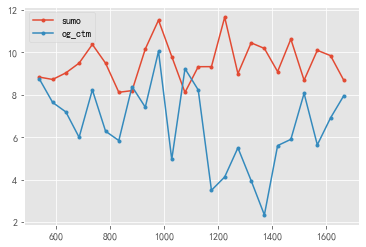

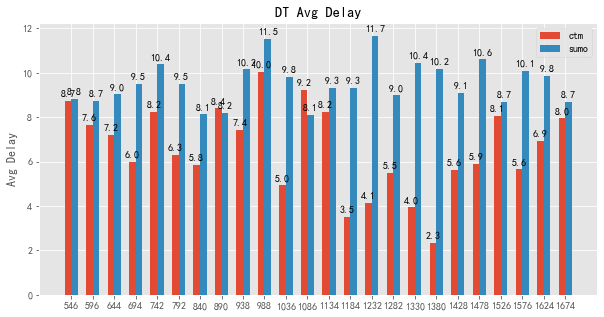

          sumo       ctm
sumo  0.942832 -0.525555
ctm  -0.525555  3.750531


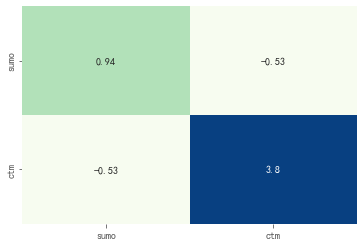

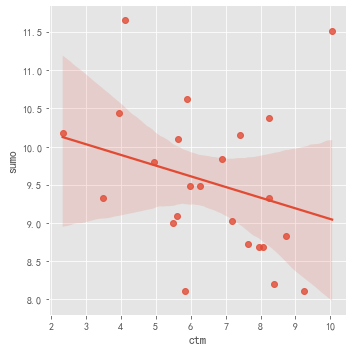

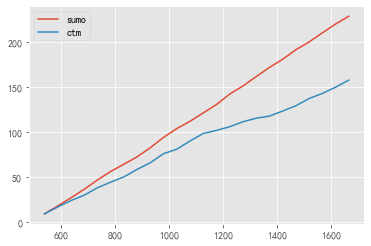

In [20]:
sumo=[8.831550784354125, 8.721639731962677, 9.03290309945838, 9.491326755503461, 10.372333305188553, 9.487031248570814, 8.11662160606452, 8.196179576637027, 10.156308246605834, 11.515880595645115, 9.802489666233647, 8.109271870678882, 9.322392638881714, 9.325083566623078, 11.652398967123489, 8.994371650275777, 10.446481884193819, 10.183676161803891, 9.09152788203547, 10.623529137935158, 8.685620533866025, 10.093797784922613, 9.843602204206281, 8.682917690597035]
ctm= [0.4855435002933849, 0.42437813498757104, 0.39950110695578833, 0.3330431201241233, 0.45721709728240967, 0.34905495968731964, 0.32466051253405487, 0.4660620472647927, 0.4119330644607544, 0.5582594871520996, 0.2752111987634139, 0.5127903548153964, 0.45721693472428754, 0.19450665874914688, 0.2293804558840665, 0.3056534311988137, 0.21976733749563043, 0.13002258810130032, 0.3114237026734786, 0.32780414277857, 0.44810774651440705, 0.3133660013025457, 0.38396136327223346, 0.4420607198368419]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
ctm = [_ * 18 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)

# p69

MAE: 1.843086817187789
MSE: 4.545041233059036
DTW距离: 30.41394884380005
            sumo        ctm
count  24.000000  24.000000
mean    9.640540   9.032471
std     0.957639   2.172944
min     8.160102   6.092859
25%     8.953778   7.290909
50%     9.722832   8.707333
75%    10.100712  10.161388
max    12.518996  14.262724


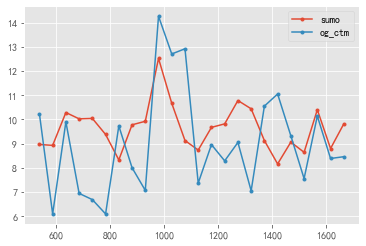

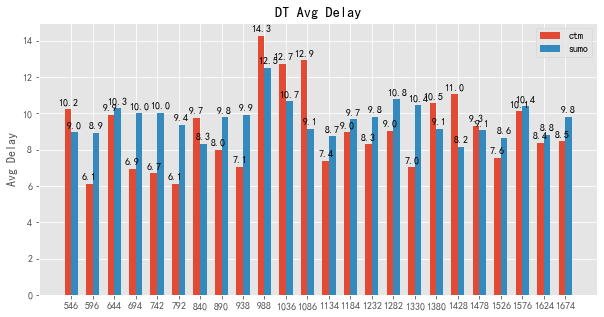

          sumo       ctm
sumo  0.917072  0.640964
ctm   0.640964  4.721684


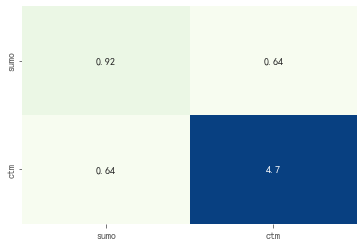

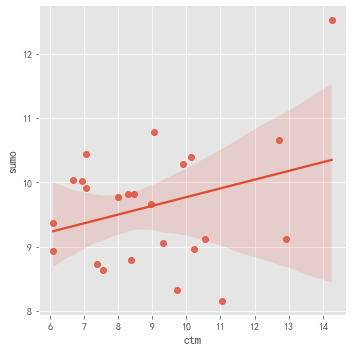

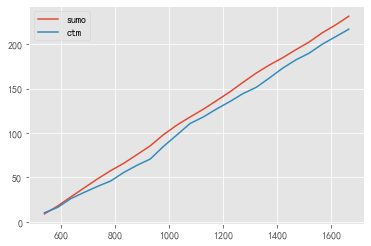

In [21]:
sumo=[8.962854103889015, 8.926549164915713, 10.283830926602375, 10.022606066797174, 10.039672769023953, 9.37689522790892, 8.325350043359446, 9.775838177542932, 9.92119277681301, 12.518996313235496, 10.665801497503473, 9.125915538680648, 8.731678376639076, 9.669826072186398, 9.81489783697028, 10.779993274391508, 10.437617847882773, 9.124341589943809, 8.160102263784461, 9.061150174101396, 8.63930543204008, 10.398944653136027, 8.795490495072496, 9.814106463935204]
ctm= [0.5115272782065652, 0.3046429699117487, 0.4948843609202992, 0.34703880548477173, 0.3341979059306058, 0.3046430240977894, 0.48651928251439874, 0.4001281207258051, 0.3532827442342585, 0.7131361961364746, 0.6351647593758323, 0.6459391658956354, 0.3682997009970925, 0.4478706284002824, 0.4142905365337025, 0.45241759581999347, 0.35238558595830743, 0.5274415016174316, 0.5524496056816794, 0.46605825424194336, 0.37765695290132, 0.506916804747148, 0.4192101684483615, 0.42286265980113635]
time0= [539, 588, 637, 686, 735, 784, 833, 882, 931, 980, 1029, 1078, 1127, 1176, 1225, 1274, 1323, 1372, 1421, 1470, 1519, 1568, 1617, 1666]
time0 = np.array(time0)
ctm = [_ * 20 for _ in ctm]
calc_indexes(sumo, ctm)
vis(sumo, ctm, time0)